# 문제 1
• 1. nltk.gutenburg에 있는 Corpus 중 원하는 텍스트를 불러와 전처리를 수행하고, 
가장 많이 사용된 명사, 동사, 형용사를 보여주는 그래프를 만들어 보기 (top 20개)

In [1]:
#0. NLTK import & loading the data
import nltk
import re
nltk.download('gutenberg')
from nltk.corpus import gutenberg
files_en = gutenberg.fileids()      # Get file ids

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\suyn3\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
doc_en=gutenberg.open('carroll-alice.txt').read()
doc_en
#저는 'carroll-alice.txt'를 선택했습니다.

'[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\nit al

In [3]:
##복습을 위해.. nltk.word_tokenize는 word 단위, nltk.sent_tokenize는 sentence 단위로 쪼갬.
# nltk - 1. tokenize
nltk.download('punkt')
no_n_doc = re.sub("\n", ' ', doc_en) #html에서 필요 없는 부분은 공백 처리
sentences=nltk.sent_tokenize(no_n_doc) #sentence 단위로 쪼갬
len(sentences)
sentences[0:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyn3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["[Alice's Adventures in Wonderland by Lewis Carroll 1865]  CHAPTER I.",
 "Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'",
 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.',
 "There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!",
 'Oh dear!']

In [4]:
tokens_en = nltk.word_tokenize(no_n_doc) #word 단위로 쪼개고 리스트로 객체화
print(tokens_en)

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', 'and', 'pickin

In [21]:
en_text = nltk.Text(tokens_en) #이제 'en'은 nltk.Text라는 개체로 정의되었다.
type(en_text)

nltk.text.Text

In [22]:
# nltk -2. pos_tag: (단어, 품사)의 튜플 형태 반환
nltk.download('averaged_perceptron_tagger')
tags_en = nltk.pos_tag(tokens_en)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\suyn3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
tags_en[:20]

[('[', 'JJ'),
 ('Alice', 'NNP'),
 ("'s", 'POS'),
 ('Adventures', 'NNS'),
 ('in', 'IN'),
 ('Wonderland', 'NNP'),
 ('by', 'IN'),
 ('Lewis', 'NNP'),
 ('Carroll', 'NNP'),
 ('1865', 'CD'),
 (']', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('I', 'PRP'),
 ('.', '.'),
 ('Down', 'RP'),
 ('the', 'DT'),
 ('Rabbit-Hole', 'JJ'),
 ('Alice', 'NNP'),
 ('was', 'VBD'),
 ('beginning', 'VBG')]

In [59]:
type(tags_en)

list

In [14]:
import pandas as pd
import numpy as np
NN= [word for (word, tag) in tags_en if tag=='NN'] #명사
VB= [word for (word, tag) in tags_en if tag=='VB'] #동사
JJ= [word for (word, tag) in tags_en if tag=='JJ'] #형용사
NN[:20]

['sister',
 'bank',
 'nothing',
 'book',
 'sister',
 'use',
 'book',
 'conversation',
 'mind',
 'day',
 'pleasure',
 'daisy-chain',
 'trouble',
 'Rabbit',
 'nothing',
 'way',
 'time',
 'mind',
 'rabbit',
 'waistcoat-pocket']

In [20]:
NN_text=nltk.Text(NN)
VB_text=nltk.Text(VB)
JJ_text=nltk.Text(JJ)

In [29]:
#nltk -3. concordance
#타겟 단어를 찾아 주변 글자들을 나타내주어 사용된 문맥을 보여줌. lines에 설정한 숫자만큼(최대 25까지 설정가능)
en_text.concordance('Alice', lines=15)

Displaying 15 of 397 matches:
[ Alice 's Adventures in Wonderland by Lewis
5 ] CHAPTER I . Down the Rabbit-Hole Alice was beginning to get very tired of s
hat is the use of a book , ' thought Alice 'without pictures or conversation ? 
so VERY remarkable in that ; nor did Alice think it so VERY much out of the way
looked at it , and then hurried on , Alice started to her feet , for it flashed
 hedge . In another moment down went Alice after it , never once considering ho
ped suddenly down , so suddenly that Alice had not a moment to think about stop
she fell past it . 'Well ! ' thought Alice to herself , 'after such a fall as t
own , I think -- ' ( for , you see , Alice had learnt several things of this so
tude or Longitude I 've got to ? ' ( Alice had no idea what Latitude was , or L
 . There was nothing else to do , so Alice soon began talking again . 'Dinah 'l
ats eat bats , I wonder ? ' And here Alice began to get rather sleepy , and wen
dry leaves , and the fall was over . Alice wa

In [30]:
#nltk -4. similar
#input에 넣은 단어와 비슷한 환경, 위치에서 사용된 단어 나열

en_text.similar('Wonderland')

waiting chance


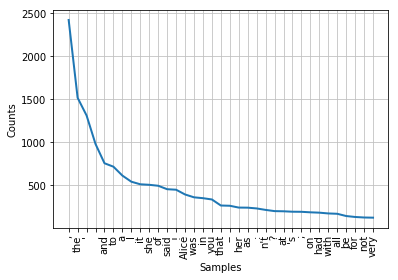

In [31]:
#nltk -5. plot (1) plot
en_text.plot(35)     # Plot sorted frequency of top 50 tokens

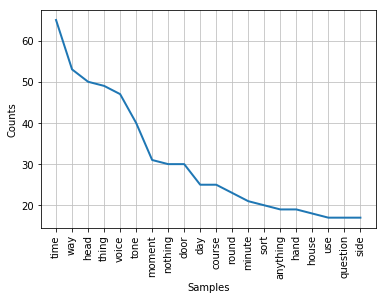

In [25]:
NN_text.plot(20) #가장 많이 사용된 top 20  명사

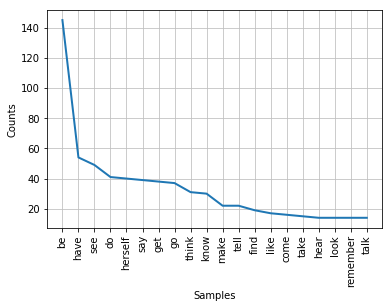

In [26]:
VB_text.plot(20) #가장 많이 사용된 top 20  동사

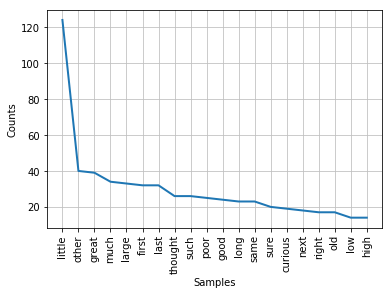

In [28]:
JJ_text.plot(20) #가장 많이 사용된 top 20 형용사

# 문제 2
• 2. nlp_data 폴더의 hotel-reviews.csv파일의 description 열에 있는 문장들을 Word2Vec 모델로 구현하고, t-sne를 활용하여 "단어"들의 유사성 분포를 시각화하기

In [32]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('nlp_data/hotel-reviews.csv')

In [34]:
describe = df['Description']
describe.head()
describe.shape

(38932,)

In [38]:
describe[:10]

0    The room was kind of clean but had a VERY stro...
1    I stayed at the Crown Plaza April -- - April -...
2    I booked this hotel through Hotwire at the low...
3    Stayed here with husband and sons on the way t...
4    My girlfriends and I stayed here to celebrate ...
5    We had - rooms. One was very nice and clearly ...
6    My husband and I have stayed in this hotel a f...
7    My wife & I stayed in this glorious city a whi...
8    My boyfriend and I stayed at the Fairmont on a...
9    Wonderful staff, great location, but it was de...
Name: Description, dtype: object

In [39]:
nltk.download('punkt')
desc = describe.str.cat(sep=" ")
sentences=nltk.sent_tokenize(desc) #sentence 단위로 쪼갬
len(sentences)
sentences[0:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyn3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The room was kind of clean but had a VERY strong smell of dogs.',
 "Generally below average but ok for a overnight stay if you're not too fussy.",
 'Would consider staying again if the price was right.',
 'Breakfast was free and just about better than nothing.',
 'I stayed at the Crown Plaza April -- - April --, ----.']

In [41]:
sent=list(sentences)

In [43]:
sent[0]

'The room was kind of clean but had a VERY strong smell of dogs.'

In [58]:
word_sentences = [nltk.word_tokenize(s) for s in sent]
word_sentences[0]

['The',
 'room',
 'was',
 'kind',
 'of',
 'clean',
 'but',
 'had',
 'a',
 'VERY',
 'strong',
 'smell',
 'of',
 'dogs',
 '.']

In [59]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(word_sentences,size=100, window=3,workers=4, min_count=5, sg=1) #workers파라미터를 올릴수록 학습이 더 잘됨.즉 비슷한 단어들끼리 더 뚜렷한 군집 생성(근데 너무 많이 주면..로딩시간이..)

model.init_sims(replace=True)

In [60]:
model.wv.most_similar('free')

[('complimentary', 0.8688684105873108),
 ('complementary', 0.8500479459762573),
 ('Free', 0.7553398609161377),
 ('Complimentary', 0.7537862062454224),
 ('FREE', 0.738580584526062),
 ('-Free', 0.7312437295913696),
 ('wi', 0.7264736294746399),
 ('fi', 0.7109949588775635),
 ('Wi-Fi', 0.7071416974067688),
 ('wi-fi', 0.6977298259735107)]

In [61]:
#T-SNE는 몇 차원이든 항상 2차원으로 만들어 주어서 시각화가 편하다.
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


18779
[-0.10539892 -0.14270855 -0.01104643  0.06040783  0.06367716  0.08575474
 -0.12011009  0.21701115 -0.15327725  0.03353285]


In [62]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.head()

,x,y
The,-104.373543,-12.128498
room,12.355291,69.377724
was,95.912987,66.066093
kind,92.481125,21.853758
of,72.126083,-94.259712


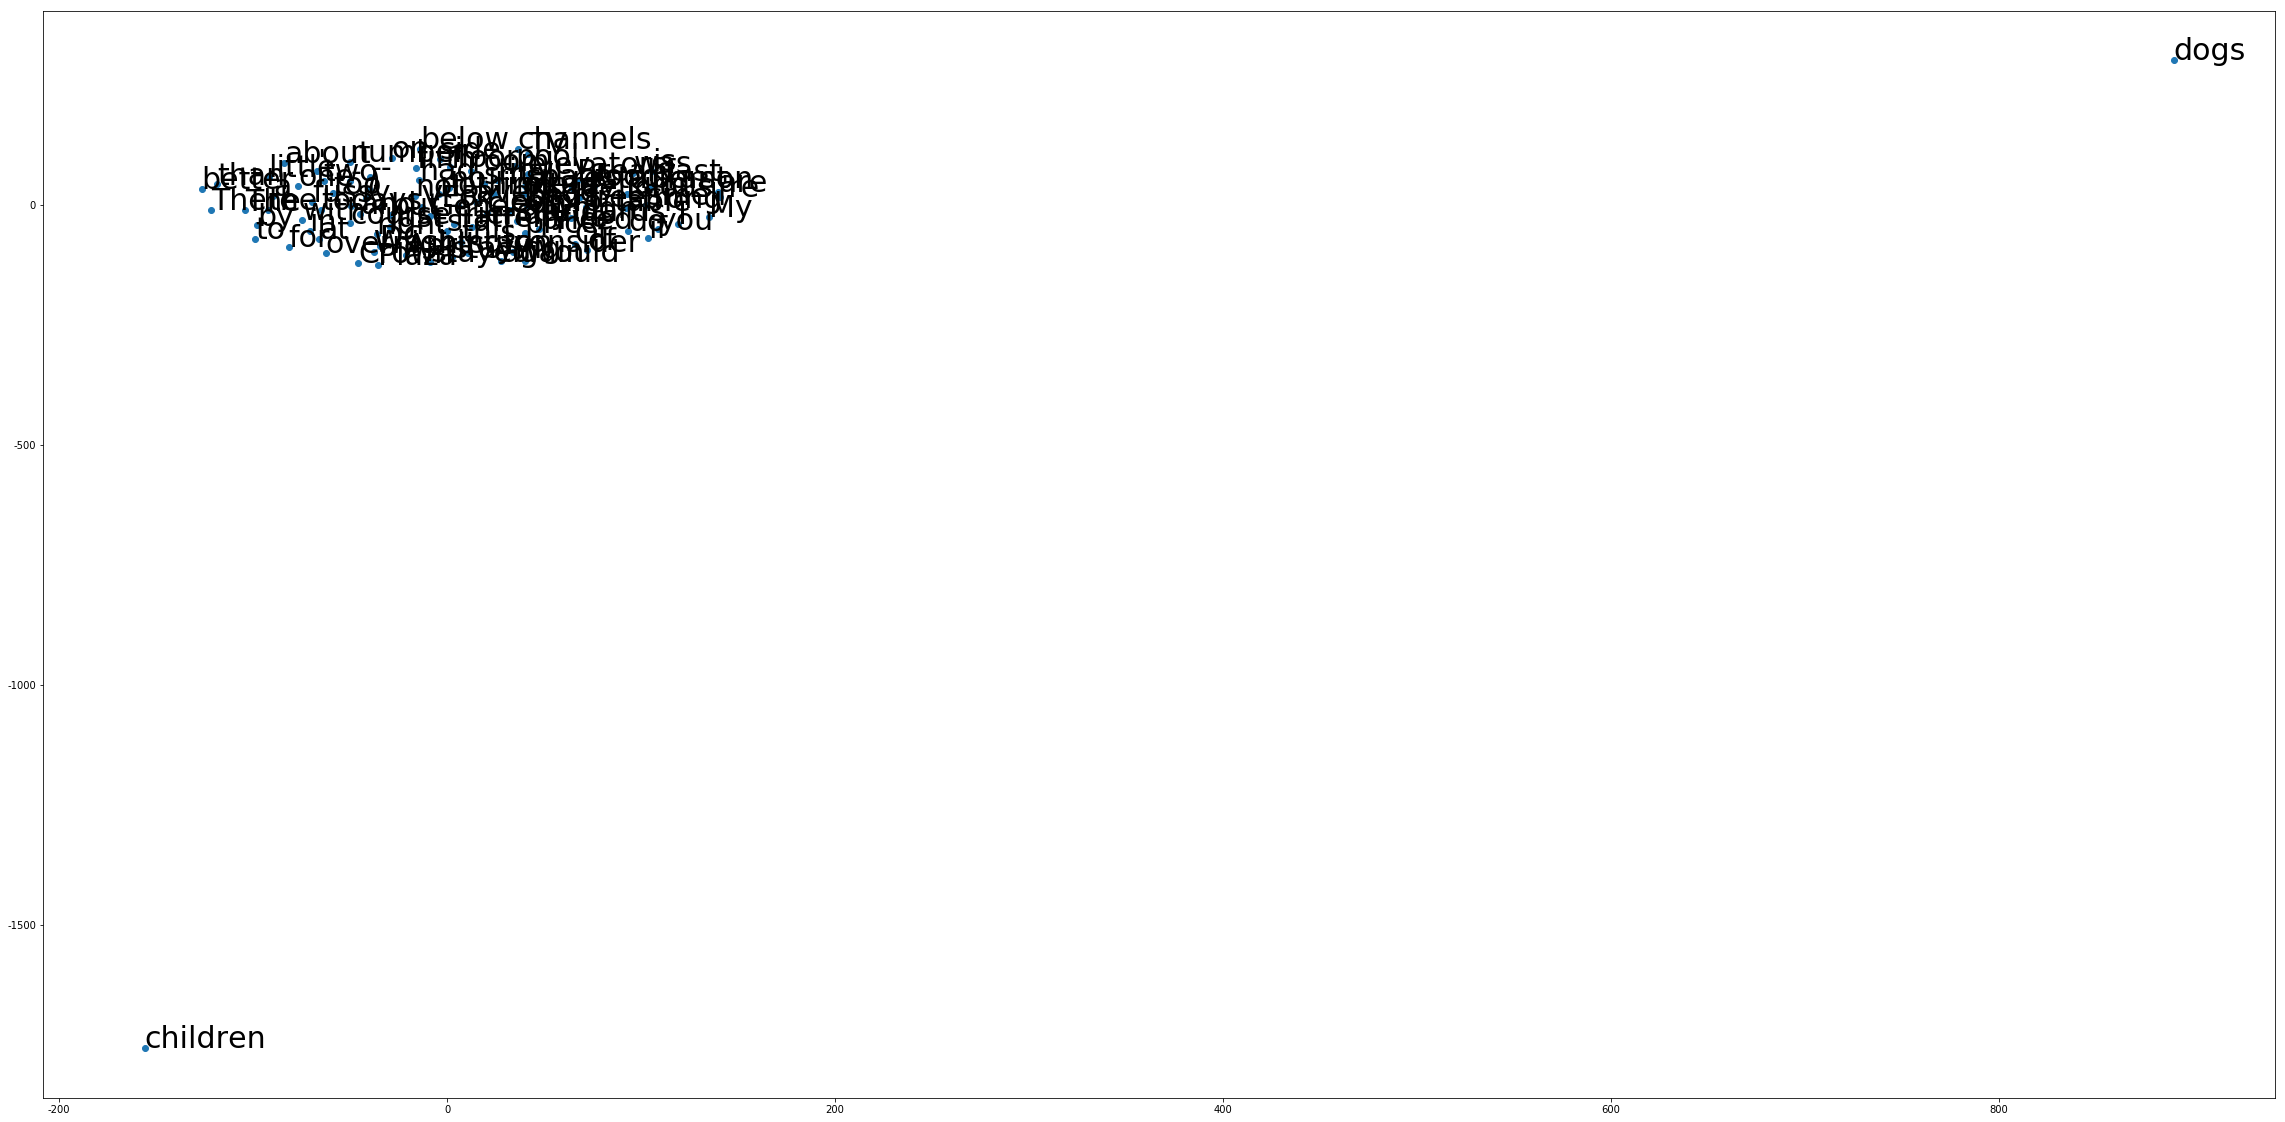

In [63]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()